# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [20]:
import numpy as np
libri = np.array([14.9,22.50,9.75,18.00,31.20])

mean = np.mean(libri)
print(mean)

libriOverMean = libri.copy()
libriOverMean = libriOverMean[libriOverMean > mean]
print(libriOverMean)



libriSconto = libri.copy()
mask = libriSconto > mean
libriSconto[mask] = libriSconto[mask] * 0.9  # Apply 10% discount (multiply by 0.9)

print(libriSconto)



19.270000000000003
[22.5 31.2]
[14.9  20.25  9.75 18.   28.08]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

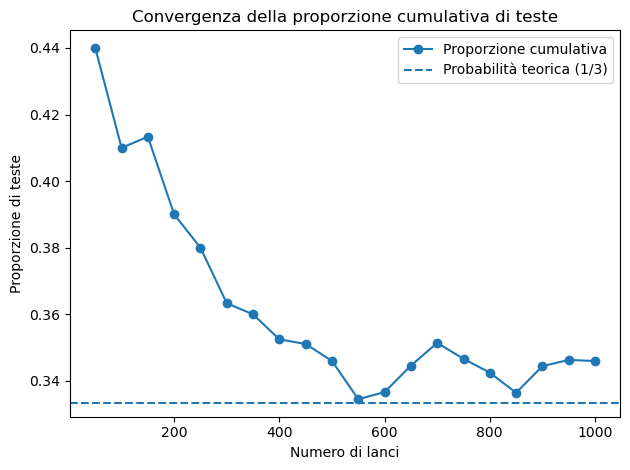

In [37]:
"""
Esercizio 2 – 1000 lanci di una moneta con P(testa)=1/3, P(croce)=2/3
• Simulazione dei lanci
• Proporzione cumulativa di teste ogni 50 lanci
• Grafico della convergenza
"""

import numpy as np
import matplotlib.pyplot as plt

# 1. Simula i lanci (1 = testa, 0 = croce)
np.random.seed(42)                  # per rendere il risultato riproducibile
n_tosses = 1000
p_heads = 1/3                       # probabilità di testa
tosses = np.random.choice([1, 0], size=n_tosses, p=[p_heads, 1 - p_heads])

# 2. Proporzione cumulativa di teste ogni 50 lanci
step = 50
checkpoints = np.arange(step, n_tosses + 1, step)      # 50, 100, 150, …, 1000
cum_heads = tosses.cumsum()[checkpoints - 1]            # conteggio cumulativo teste
prop_heads = cum_heads / checkpoints                    # proporzione cumulativa

# (Stampa tabella rapida)
""" for n, prop in zip(checkpoints, prop_heads):
    print(f"Dopo {n:4d} lanci -> proporzione teste: {prop:.3f}") """

# 3. Grafico della convergenza
plt.figure()
plt.plot(checkpoints, prop_heads, marker='o', label='Proporzione cumulativa')
plt.axhline(y=p_heads, linestyle='--', label='Probabilità teorica (1/3)')
plt.xlabel("Numero di lanci")
plt.ylabel("Proporzione di teste")
plt.title("Convergenza della proporzione cumulativa di teste")
plt.legend()
plt.tight_layout()
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [35]:
import numpy as np
def mat_normalizzata(matrix):
    mean = np.mean(matrix)
    std = np.std(matrix)
    
    return (matrix - mean) / std


np.random.seed(42)
mat = np.random.normal(5, 2, (6,10))

normalizzataMat = mat_normalizzata(mat)


## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


(10000, 23)
    book_id  goodreads_book_id  best_book_id   work_id  books_count  \
1         2                  3             3   4640799          491   
0         1            2767052       2767052   2792775          272   
24       25             136251        136251   2963218          263   
17       18                  5             5   2402163          376   
23       24                  6             6   3046572          332   
26       27                  1             1  41335427          275   
20       21                  2             2   2809203          307   
3         4               2657          2657   3275794          487   
30       31            4667024       4667024   4717423          183   
22       23              15881         15881   6231171          398   

          isbn        isbn13                                  authors  \
1    439554934  9.780440e+12              J.K. Rowling, Mary GrandPré   
0    439023483  9.780439e+12                          Suzann

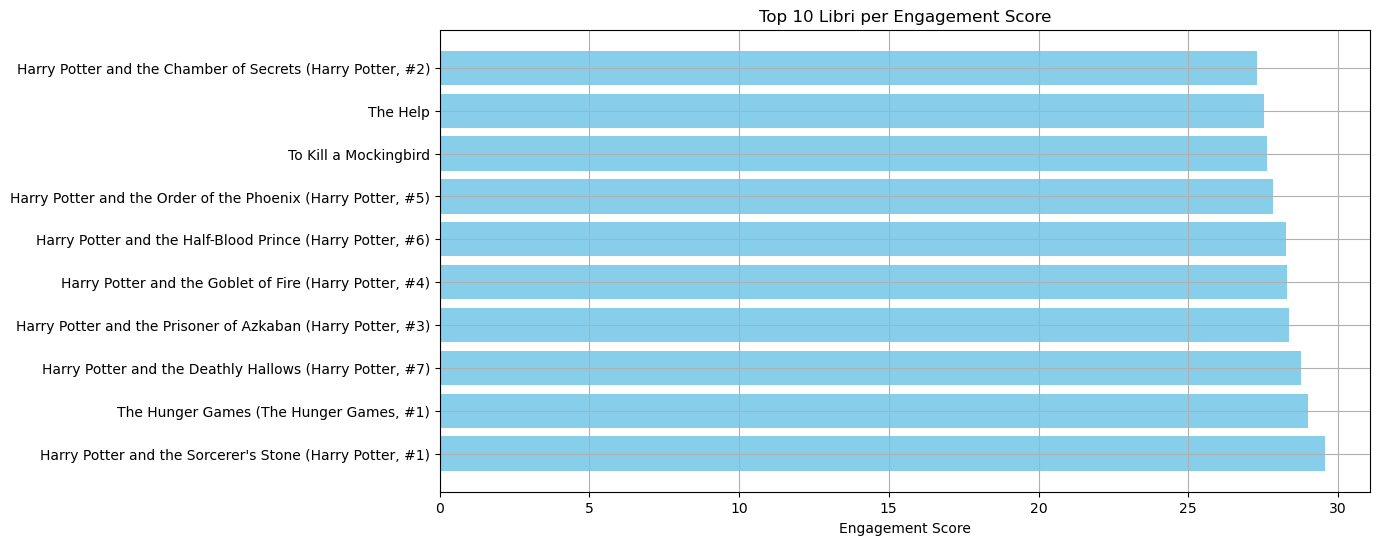

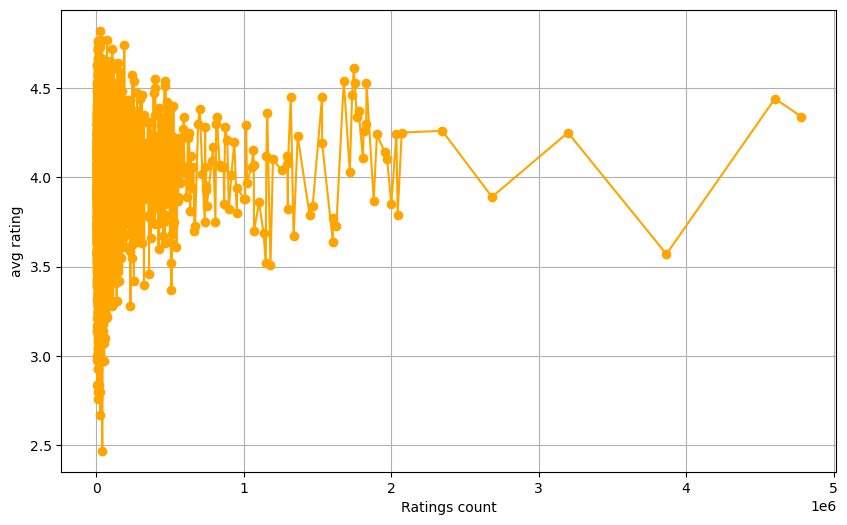

In [123]:
import pandas as pd
import numpy as np

df = pd.read_csv("books.csv")
print(df.shape)
#print(df.head(1))



df["engagement_score"] = df["average_rating"] * np.log10(1 + df["ratings_count"])

df.sort_values("engagement_score", ascending=False, inplace=True)
#print("Sorted" , df["engagement_score"].head(1))



""" 3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.
 """
 
 
bookOver45 = df[df["average_rating"] > 4.5]
#print("Over 4.5 avg rating", bookOver45)
""" 4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.
 """
engScorTop10 = df.head(10)
print(engScorTop10)

plt.figure(figsize=(12, 6))
plt.barh(engScorTop10['title'], engScorTop10['engagement_score'], color='skyblue')
plt.grid()
plt.xlabel('Engagement Score')
plt.title('Top 10 Libri per Engagement Score')
plt.show()
""" 5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.
 """
 
df.sort_values(by='ratings_count', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df['ratings_count'], df['average_rating'], marker='o', linestyle='-', color='orange')
plt.xlabel("Ratings count")
plt.ylabel("avg rating")
plt.grid()
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


C:\Users\acer\AppData\Local\Temp\ipykernel_11952\237643795.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[value].fillna(moda, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_11952\237643795.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_age_group = df.groupby('age_group')['high_income'].mean() * 100


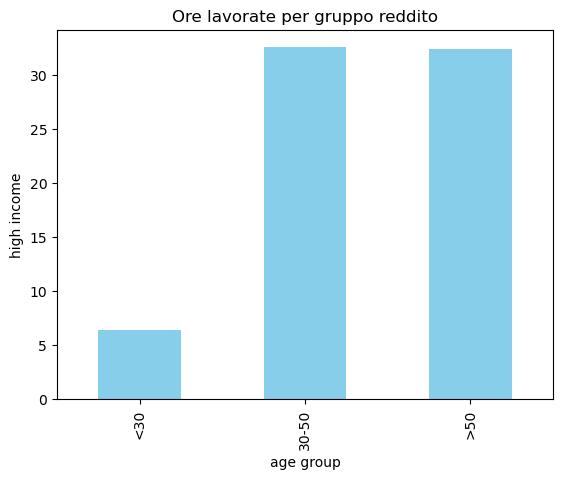

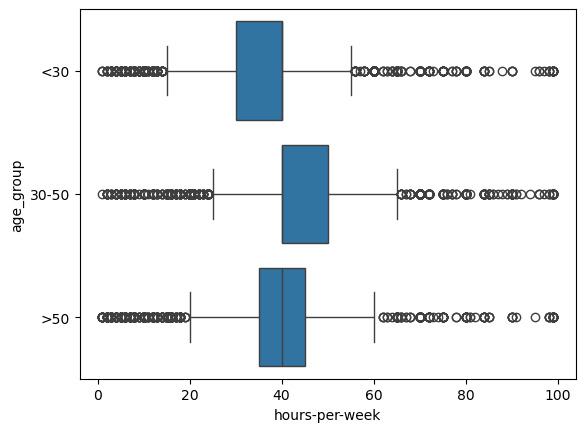

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("adult_con_titoli.csv")
#print(df.shape[0], df.shape[1])
#print(df.isnull().sum())

for value in ['workclass', 'occupation', 'native-country']:
    moda = df[value].mode()[0]
    df[value].fillna(moda, inplace=True)
    
""" 4. Calcola l’**età media** (`age`) per sesso (`sex`)
 """
 
avgAgeSex = df.groupby('sex')['age'].mean()
# 5. Trova la % di persone che guadagnano **>50K** per sesso.

df["high_income"] = df["income"].str.strip() == ">50K"
percent_income_sex = df.groupby("sex")["high_income"].mean() * 100
#print("Sex income", percent_income_sex)
#7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.


df["age_group"] = pd.cut(df["age"], bins=(0,30,50,150), labels=["<30", "30-50", ">50"])
#print(df.head(5))
""" 8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50). """


income_age_group = df.groupby('age_group')['high_income'].mean() * 100
income_age_group.plot(kind='bar', color='skyblue')
plt.xlabel("age group")
plt.ylabel("high income")
plt.title("Ore lavorate per gruppo reddito")
plt.show()




sns.boxplot(data=df, x=df["hours-per-week"], y=df["age_group"])
plt.xticks(rotation=0)  

plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

Parametri stimati: a = 2.383, b = 1.477
MAE  = 0.369
RMSE = 0.473


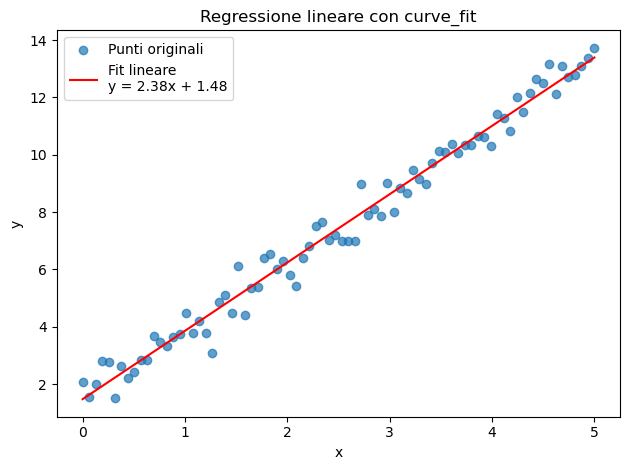

In [121]:
"""
Esercizio 6
• Fit lineare con curve_fit
• Grafico punti + retta
• Calcolo MAE e RMSE
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------------------------
# 1. Dati e modello
# -------------------------------------------------
np.random.seed(0)                           # per replicare i risultati
x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

def linear_model(x, a, b):
    """Retta y = a·x + b"""
    return a * x + b

# -------------------------------------------------
# 2. Stima parametri con curve_fit
# -------------------------------------------------
popt, pcov = curve_fit(linear_model, x, y)   # popt = [a_hat, b_hat]
a_hat, b_hat = popt
print(f"Parametri stimati: a = {a_hat:.3f}, b = {b_hat:.3f}")

# Predizioni
y_pred = linear_model(x, a_hat, b_hat)

# -------------------------------------------------
# 3. Metriche di errore
# -------------------------------------------------
mae  = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"MAE  = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

# -------------------------------------------------
# 4. Grafico
# -------------------------------------------------
plt.figure()
plt.scatter(x, y, label="Punti originali", alpha=0.7)
plt.plot(x, y_pred, color="red", label=f"Fit lineare\ny = {a_hat:.2f}x + {b_hat:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressione lineare con curve_fit")
plt.legend()
plt.tight_layout()
plt.show()
